In [10]:
# zstandard needs to be imported before graph_tool!!
import zstandard
import graph_tool.all as gt

In [24]:
import matplotlib.pyplot as plt
import networkx as nx
import pickle

from pygenstability import plotting
from pygenstability.contrib.optimal_scales import *

# Setup MSF

In [12]:
import sys
from pathlib import Path

module_path = str(Path.cwd().parents[0])
if module_path not in sys.path:
    sys.path.append(module_path)

from msfiltration import MSF
from msfiltration.msf_bootstrapping import plot_pds, select_scales_pds, msf_bootstrap

In [13]:
# Set MS parameters
n_time = 200
min_time = -1.5
max_time = 0.5

In [14]:
# number of bootstraps
B = 20
# number of samples for each bootstrap
n_sample = 150

# 3rd real network: Wiki Science

https://networks.skewed.de/net/wiki_science

In [15]:
# Load network with gt
G_gt = gt.collection.ns["wiki_science"]

# Extract LCC
G_gt = gt.extract_largest_component(G_gt)

# Get sparse adjacency matrix
A = gt.adjacency(G_gt)

# Import graph to networkx
G = nx.from_scipy_sparse_matrix(A)

In [16]:
# Compute spring layout
pos = nx.spring_layout(G,seed=5)

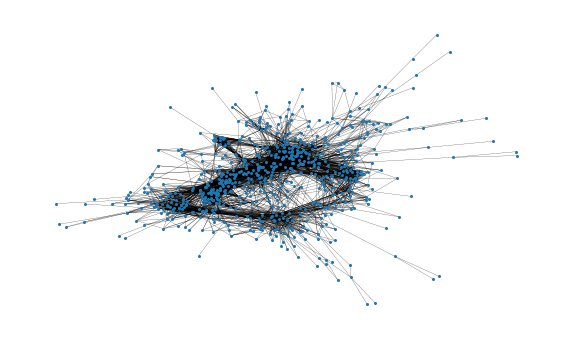

In [17]:
# Plot network
fig, ax = plt.subplots(1,figsize =(10,6))
nx.draw(G,ax=ax,pos=pos, node_size = 4,width = 0.2)

In [18]:
print(G)

Graph with 677 nodes and 6517 edges


### Full MSF

In [19]:
# initialise MSF object
msf = MSF()

# run MS analysis, build filtration and compute PH
msf.fit_transform(A,min_time,max_time,n_time,with_ttprime=True,with_optimal_scales=True)

Running Markov Stability analysis ... 


100%|██████████| 200/200 [16:47<00:00,  5.04s/it]


Building filtration ...


100%|██████████| 200/200 [02:26<00:00,  1.37it/s]


Computing persistence ... 


In [25]:
# store ms results
root = "/home/tc/OneDrive/Software/MSFiltration/experiments/results/real networks/"
with open(root + "ms_wiki_science.pkl", "wb") as handle:
    pickle.dump(
        msf.ms_results, handle, protocol=pickle.HIGHEST_PROTOCOL,
    )

In [ ]:
# # load ms results
# with open(root + "ms_wiki_science.pkl", 'rb') as handle:
#         ms_results = pickle.load(handle)

# # initialise new MSF object and compute PH
# msf = MSF()
# msf.load_ms_results(ms_results)
# msf.build_filtration()
# msf.compute_persistence()

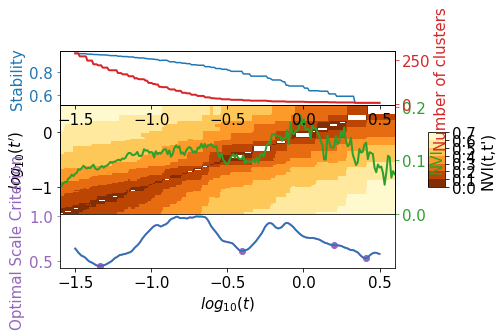

In [31]:
# select optimal scales with nvi
identify_optimal_scales(msf.ms_results,criterion_threshold=0,window_size=30)
selected_scales_nvi = msf.log_times[msf.ms_results['selected_partitions']]
# plot nvi summary of ms
plotting.plot_scan(msf.ms_results)

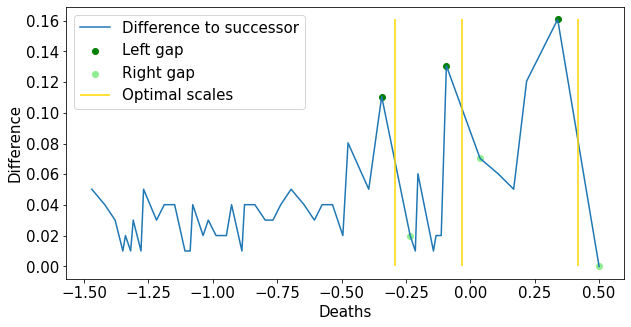

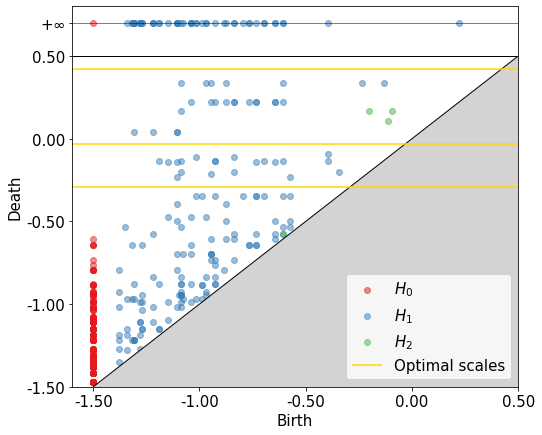

In [26]:
# select optimal scales with ph
msf.select_scales(with_plot=True, threshold_abs=0,min_gap_width=0.105)
# plot persistence diagram with optimal scales
ax = msf.plot_persistence_diagram()

### Bootstrap MSF

In [22]:
persistences_bootstrapped = msf_bootstrap(msf.community_ids, msf.log_times, n_sample, B)

Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 831.01it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 936.65it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 798.88it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 1017.83it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 705.74it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 1151.84it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 703.78it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 689.32it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 851.65it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 1058.99it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 684.58it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 1060.33it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 989.79it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 672.26it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 1015.23it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 983.40it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 758.39it/s] 


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 1205.06it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 1085.48it/s]


Computing persistence ... 
Building filtration ...


100%|██████████| 200/200 [00:00<00:00, 729.67it/s] 


Computing persistence ... 


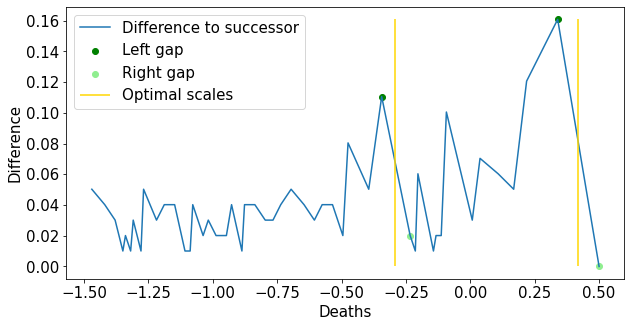

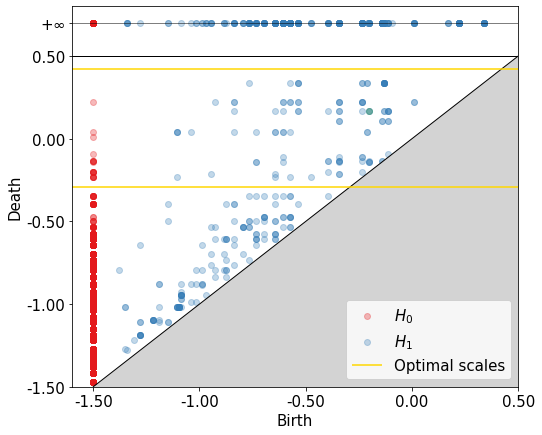

In [27]:
# select optimal scales with ph
optimal_scales_ph, gap_width, ax = select_scales_pds(persistences_bootstrapped, msf.log_times, with_plot=True,threshold_abs=0,min_gap_width=0.105)

# plot optimal scales in PD
fig, ax = plot_pds(persistences_bootstrapped,msf.log_times,optimal_scales_ph,alpha=0.3)